<a href="https://colab.research.google.com/github/vivek171234/Skfuzzy/blob/main/tipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=7d75eb98529fdd7bfde36ef13dfdef9cab1ea52db5876096794ed961412e1c0a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
import numpy as np


In [5]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [7]:
food=ctrl.Antecedent(np.arange(0,11,1),'food')

In [10]:
service=ctrl.Antecedent(np.arange(0,11,1),'service')

In [12]:
tip=ctrl.Consequent(np.arange(0,21,1),'tip')

In [17]:
service.automf(number=3,names=['bad','decent','good'])

In [16]:
food.automf(number=3,names=['bad','decent','good'])

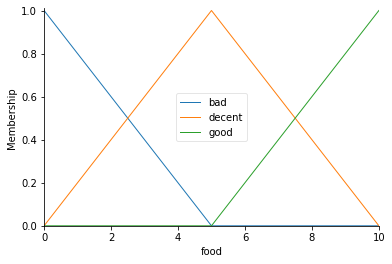

In [19]:
food.view()

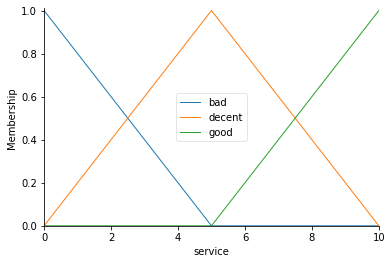

In [20]:
 service.view()

In [22]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [24]:
tip['low']=fuzzy.trimf(tip.universe,[0,0,10])
tip['medium']=fuzzy.trimf(tip.universe,[0,10,20])
tip['high']=fuzzy.trimf(tip.universe,[12,20,20])

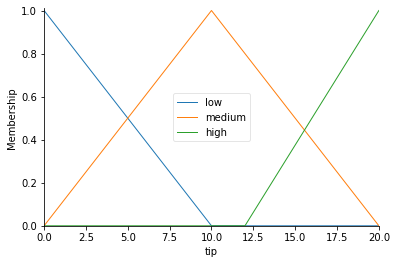

In [25]:
tip.view()

In [28]:
rule1=ctrl.Rule(food['bad'] | service['bad'],tip['low'])
rule2=ctrl.Rule(service['decent'],tip['medium'])
rule3=ctrl.Rule(service['good'] |food['good'],tip['high'])

In [30]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3])

In [31]:
fuzzy_system=ctrl.ControlSystemSimulation(control_system)


In [32]:
fuzzy_system.input['food']=6.5
fuzzy_system.input['service']=5.0
fuzzy_system.compute()

In [34]:
print(fuzzy_system.output['tip'])

10.387559808612437


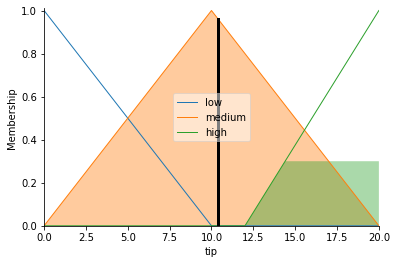

In [35]:
tip.view(sim=fuzzy_system)